# Action1

#### 数据加载

In [1]:
import pandas as pd 

In [2]:
train_data = pd.read_csv('cs-training.csv')

##### 数据探索

In [3]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


##### 去掉第一列 unnamed

In [4]:
train_data = train_data.iloc[:,1:]
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
train_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

##### 数据可视化

In [6]:
import seaborn as sn

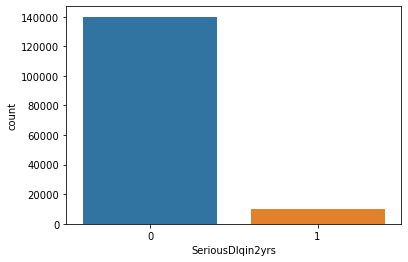

In [7]:
sn.countplot(x= 'SeriousDlqin2yrs', data = train_data)

In [8]:
#违约比例
train_data['SeriousDlqin2yrs'].sum() / len(train_data)

0.06684

In [9]:
##### 缺失值
train_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
train_data.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [11]:
###使用中位数进行填充
train_data = train_data.fillna(train_data.median())

In [12]:
#检查是否还有缺失值
train_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 数据分箱

##### 对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]

In [13]:
import math

In [14]:
#将age字段进行分箱

In [15]:
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
train_data['bin_age'] = pd.cut(train_data['age'], bins = age_bins)
train_data[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


##### 对于NumberOfDependents（家属人数）字段，分成6段 [-math.inf,2,4,6,8,10,math.inf]

In [16]:
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]

In [17]:
train_data['bin_dependent'] = pd.cut(train_data['NumberOfDependents'], bins = dependent_bins)

In [18]:
train_data[['NumberOfDependents','bin_dependent']]

,NumberOfDependents,bin_dependent
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


##### 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段 

In [19]:
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]

In [20]:
train_data['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(train_data['NumberOfTime30-59DaysPastDueNotWorse'], bins = dpd_bins)
train_data['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(train_data['NumberOfTime60-89DaysPastDueNotWorse'], bins = dpd_bins)
train_data['bin_NumberOfTimes90DaysLate'] = pd.cut(train_data['NumberOfTimes90DaysLate'], bins = dpd_bins)

In [21]:
#查看分箱情况
train_data[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


##### 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [22]:
train_data['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(train_data['RevolvingUtilizationOfUnsecuredLines'], q =5, duplicates= 'drop')

In [23]:
train_data['bin_DebtRatio'] = pd.qcut(train_data['DebtRatio'], q =5, duplicates= 'drop')
train_data['bin_MonthlyIncome'] = pd.qcut(train_data['MonthlyIncome'], q =5, duplicates= 'drop')
train_data['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(train_data['NumberOfOpenCreditLinesAndLoans'], q =5, duplicates= 'drop')
#train_data['bin_NumberRealEstateLoansOrLines'] = pd.qcut(train_data['NumberRealEstateLoansOrLines'], q =5, duplicates= 'drop')
loan_bins = [-math.inf,0,1,2,3,math.inf]
train_data['bin_NumberRealEstateLoansOrLines'] = pd.cut(train_data['NumberRealEstateLoansOrLines'], bins=loan_bins)

In [24]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_dependent,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [25]:
train_data['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

### 统计分箱字段

In [26]:
bin_cols = [c for c in train_data.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_dependent',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

##### 计算 IV值

In [27]:
import numpy as np 

In [28]:
def cal_IV (df, feature, target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    #对feature字段的每个分箱值进行遍历
    for i in range(df[feature].nunique()): #nunique 是不同值的个数
        #得到feature字段的第i个分箱取值
        val = list(df[feature].unique())[i]
        #统计feature， feature value的个数以及value导致target = 1 的个数
        lst.append([ feature, val,df[df[feature]==val].count()[feature], df[(df[feature]==val) & (df[target]==1)].count()[feature] ])

    #print(lst)
    data = pd.DataFrame(lst, columns= cols)
    data = data[data['Bad']>0]
    
    data['Share'] = data['All'] / data['All'].sum() #这个value所占的比例
    data['Bad Rate'] = data['Bad'] / data['All'] #这个value导致bad的情况，在该value个数的比例
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum()-data['Bad'].sum()) #好的情况所占的比例
    
    #计算WOE值
    data['woe'] = np.log(data['Margin Bad']/data['Margin Good'])
    
    #计算IV值
    data['iv'] = data['woe'] * (data['Margin Bad'] - data['Margin Good'])
    
    data = data.sort_values(by=['Variable', 'Value'])
    
    return data['iv'].sum()

In [29]:
cal_IV(train_data, 'bin_age','SeriousDlqin2yrs')

0.24041120302785984

#### 计算每个字段的iv值

In [30]:
feature_cols = []
for col in bin_cols:
    iv = cal_IV(train_data, col, 'SeriousDlqin2yrs')
    print(col, iv)
    if iv > 0.1: #选出值超过0.1的字段作为特征字段
        feature_cols.append(col)

bin_age 0.24041120302785984
bin_dependent 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.49244477457019803
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714755
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


In [31]:
feature_cols

['bin_age',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines']

##### 计算特征的woe

In [32]:
def cal_WOE(df, feature, target):
    df_new = df.copy()
    for f in feature:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad', target+'count':'all'})
        
        #print(df_woe)
        #计算woe值
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['woe'] = np.log1p(df_woe['margin bad']/ df_woe['margin good'])
        
        #print(df_woe)
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        #print(df_woe)
        df_new = df_new.merge(df_woe, on = f, how = 'left')
    
    return df_new

In [33]:
df_woe = cal_WOE(train_data, bin_cols, 'SeriousDlqin2yrs')

In [34]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184591,0.184121,0.691873,419,3652,3233,0.023097,0.041791,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.218298,0.309495,0.882845,4672,56188,51516,0.368040,0.465988,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.218298,0.309495,0.882845,4672,56188,51516,0.368040,0.465988,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.178405,0.156892,0.630962,4672,56188,51516,0.368040,0.465988,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.251082,0.201177,0.588475,2748,52338,49590,0.354280,0.274087,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.218298,0.309495,0.882845,2748,52338,49590,0.354280,0.274087,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.218298,0.309495,0.882845,2748,52338,49590,0.354280,0.274087,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184591,0.184121,0.691873,2748,52338,49590,0.354280,0.274087,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.218298,0.309495,0.882845,4672,56188,51516,0.368040,0.465988,0.818076


In [35]:
feature_cols = ['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines']

##### 得到woe规则, features, bin, woe

In [36]:
df_bin_to_woe = pd.DataFrame(columns=['features','bin', 'woe'])

#### 由以下数据我们可以获得一个大致的woe规则，也就是我们的评分卡规则。 影响力比较大的主要有五个字段。
#### 首先是年纪，太年轻和太老的个人承担风险的能力不是很强，因此有可能发生逾期90天以上还债
#### 客户过往的信用往来记录也是很重要的指标，从下面可以看到如果过去又发生长时间的逾期，那么就会成为一个风险区分的明显特征
#### 最后是客户的信用卡余额，一般来说余额越少，发生逾期的可能也越大

In [37]:
for f in feature_cols:
    b = 'bin_' + f
    w = 'woe_bin_' + f 
    df = df_woe[[w,b]].drop_duplicates()
    df.columns= ('woe','bin')
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])

df_bin_to_woe

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848
19,age,"(-inf, 25.0]",1.013134
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111


### 逻辑回归建模

In [38]:
#数据切分
from sklearn.model_selection import train_test_split

In [39]:
#挑选出woe值>0.1的字段作为特征
woe_cols = ['woe_bin_'+c for c in feature_cols]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size = 0.2, random_state = 45)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
model = LogisticRegression(random_state=45).fit(x_train, y_train)

In [44]:
#使用模型预测，然后查看预测的精确值
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.9368


#### 生成评分卡模型, 假设A为650， B为50

In [45]:
pod = 50

In [46]:
odds = 1

In [47]:
import math

##### 根据公式求出A和B的值

In [48]:
B = pod / math.log(2)

In [49]:
A = 650 + B*math.log(1)
A

650.0

In [50]:
B

72.13475204444818

In [51]:
def generate_scorecard(model_coef, binning_df, features, B):
    lst = []
    cols = ['Variable', 'Binning', 'Score']
    #模型系数
    coef = model_coef[0]
    print(coef)
    for i in range(len(features)):
        f = features[i]
        print(f)
        
        #得到feature的WOE规则
        df = binning_df[binning_df['features'] == f]
        #print(df)
        for index, row in df.iterrows():
            score = int(round(-coef[i] * row['woe'] * B)) #coef前面是- 因为需要用基准分减去这个值
            lst.append([f,row['bin'], score])
    data = pd.DataFrame(lst, columns= cols)
    return data

In [52]:
score_card = generate_scorecard(model.coef_, df_bin_to_woe, feature_cols, B)

[1.089562   0.86714077 0.45791386 0.73458286 1.44959034]
age
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines


#### 下面就是评分卡规则， 对于每一个特征（比如年龄）的每一中分箱（范围），都给了一个刻度（B)值。刻度值是负数，如果违约概率越高，那么刻度值越小（接近负无穷）
#### 那么对于任何一个客户，我们都可以基于这个规则来打分，可以根据某个客户的以下特征，归到相应的分箱，然后得到对应的刻度数，在把五个特征的分数都计算完之后，可以将分数加和。
#### 最后用一个基准分（A) 来减去(也可以理解成加上，因为刻度是负的)算出的刻度数，就是客户最后的评分。

In [53]:
score_card


,Variable,Binning,Score
0,age,"(40.0, 50.0]",-64
1,age,"(25.0, 40.0]",-75
2,age,"(70.0, inf]",-22
3,age,"(50.0, 60.0]",-51
4,age,"(60.0, 70.0]",-32
5,age,"(-inf, 25.0]",-80
6,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-112
7,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
8,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-135
9,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-152


In [54]:
#对每个字段按照分数降序排序，查看规则
sorted_score_card = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending= False))

In [55]:
sorted_score_card

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     15  NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 25  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     31               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     33               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     35               NumberOfTimes90DaysLate   
                                     32               NumberOfTimes90DaysLate   
                                     34               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  2                                    age   
                                     4                                    age   
                                     3                                    age   
                                     0                                    age   
                                     1                                    age   
                                     5                                    age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 7        (-inf, 1.0]    -36  
                                     6         (1.0, 2.0]   -112  
                                     14        (7.0, 8.0]   -127  
                                     15        (8.0, 9.0]   -130  
                                     8         (2.0, 3.0]   -135  
                                     9         (3.0, 4.0]   -152  
                                     10        (4

In [70]:
#将字符转为数值, 主要是为了转换无穷大小的值
def str_to_int(s):
    if s == '-inf':
        return -999999
    if s == 'inf':
        return 999999
    return float(s)

#将value映射到bin
def map_value_to_bin(feature_value, feature_to_bin):
    for index, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0] == '('
        right_open = bins[-1] == ')'
        binnings = bins[1:-1].split(',')
        in_range = True
        #检查左括号
        if left_open:
            if feature_value <= str_to_int(binnings[0]):
                in_range = False
        else:
            if feature_value < str_to_int(binnings[0]):
                in_range = False
                
        #检查右括号
        if right_open:
            if feature_value >= str_to_int(binnings[1]):
                in_range = False
        else:
            if feature_value > str_to_int(binnings[1]):
                in_range = False
        if in_range:
            return row['Binning']
    return null

# 通过评分卡规则转换为分数
def map_to_score(df, score_card):
    score_cols = list(score_card['Variable'].unique())
    score = 0
    for col in score_cols:
        feature_to_bin = score_card[score_card['Variable'] == col]
        feature_value = df[col]
        #将value映射到bin
        selected_bin = map_value_to_bin(feature_value, feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score = score + selected_record_in_scorecard['Score'].iloc[0]
    return score

##### 使用模型计算分数

In [71]:
def calculate_score_with_card(df, score_card, A):
    df['score'] = df.apply(map_to_score, args=(score_card,), axis = 1)
    df['score'] += A #加上基准分
    df['score'] = df['score'].astype(int)
    return df

In [72]:
#随机抽选几名表现好的客户来看看评分情况
good_sample = train_data[train_data['SeriousDlqin2yrs']==0].sample(5)
good_sample = good_sample[feature_cols]

In [73]:
calculate_score_with_card(good_sample, score_card, A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
142077,42,0,0,0,0.325202,422
146077,58,1,0,0,0.029521,488
1346,49,0,0,0,0.045694,475
7393,65,0,0,0,0.102127,492
13456,86,0,0,0,0.002686,513


In [76]:
#随机抽选几名表现差的客户来看看评分情况
bad_sample = train_data[train_data['SeriousDlqin2yrs']==1].sample(5)
bad_sample = bad_sample[feature_cols]

In [77]:
calculate_score_with_card(bad_sample, score_card, A)

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
46823,32,0,0,0,0.932097,330
3873,71,1,0,2,0.000000,402
124967,29,0,0,0,1.000000,330
142636,30,0,0,0,0.661004,411
139015,34,0,0,0,0.065893,464


#### 我们确实可以看到下面的评分要普遍低一些。根据我们的评分卡规则，有可能违约的客户几个特征的刻度值越小，加上基准分后的评分也会较小